# Chaotic Lorenz attractor particle filter estimation
This example shows state estimation to track a nonlinear system with chaotic behavior.

![Chaotic Lorenz attractor particle filter estimation](./lorenz.gif)

## Problem

**Model.** The Lorenz attractor is a nonlinear system

$$
\dot{x}_0 = \sigma (x_1 - x_0) \\
\dot{x}_1 = x_0 (\rho - x_2) - x_1 \\
\dot{x}_2 = x_0 x_1 - \beta x_2
$$
where $\rho = 28$, $\sigma = 10$, and $\beta = 8 / 3$ are the coefficients that lead to the famous "butterfly" trajectories.  Assume that Gaussian process noise is added to each state.  State trajectories are attracted to one of two local regions, and small changes in state will cause the trajectory to be pushed onto the opposing attractor.  This is challenging for estimators because this bifurcation in state trajectories will quickly deform a belief distribution away from a Gaussian into multiple modes.

**Estimation.** Suppose we have a measurement model 

$$
y_0 = x_0 - x_1 \\
y_1 = x_2
$$
with additive Gaussian noise for each measurement.  The goal is to estimate $x$ from the measurements.  The animation shows the particle filter posterior density, where higher posterior weights are pink.  Because the system is nonlinear, we compare the EKF (local linearization) and particle filter (sampling-based posterior approximation).  The comparison of EKF and PF shows that the PF will out perform the EKF because it can capture the state bifurcation and multimodal posterior density.  EKF loses tracking and has a higher degree of uncertainty.

## Example

To run the example, build and install the C++ and Python libraries from the main README instructions.  Start the docker container.
```
cd /libsia/examples/lorenz
python lorenz.py --help
python lorenz.py
```

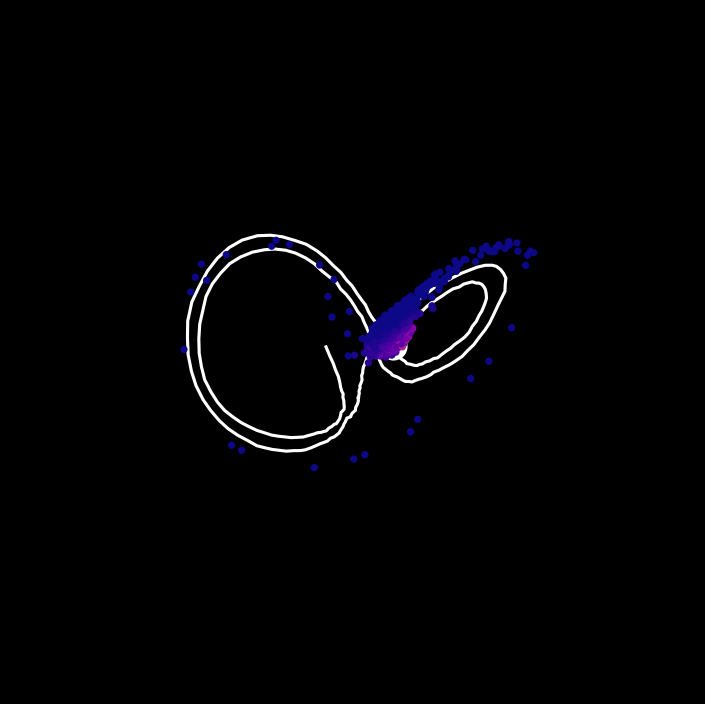

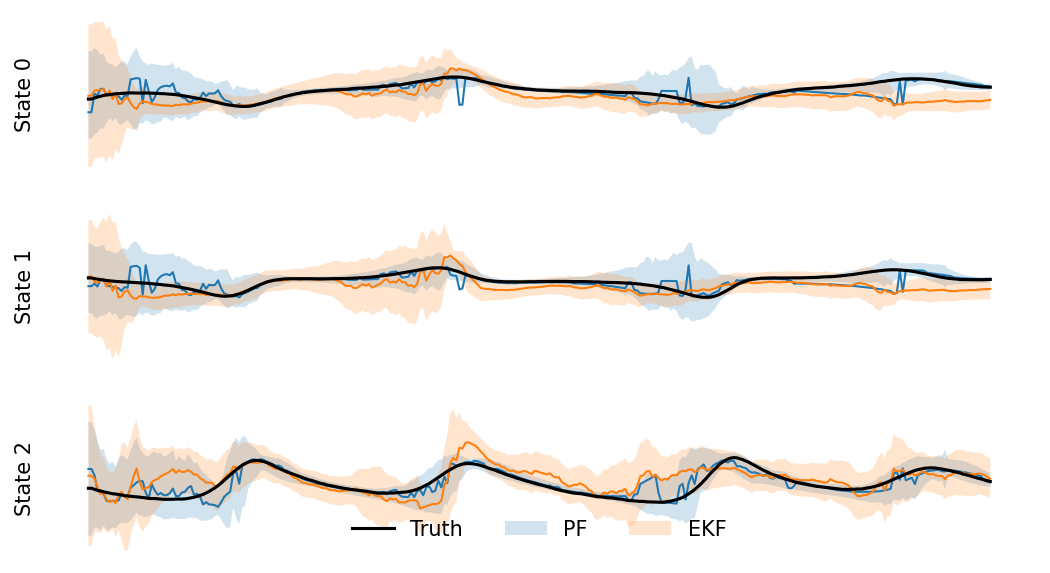

In [1]:
# This example uses the python bindings
from lorenz import main

# This is the same as running the python script
main(num_steps=300,
     process_noise=1E0,
     measurement_noise=5E2,
     num_particles=1000,
     resample_threshold=0.1,
     roughening_factor=1E-3,
     video_name="lorenz-animated.mp4",
     dpi=150,
     show_plots=True)